In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

In [5]:
# 13368B4

name = str(15623)
file_path = "../Metal_stuff/coil_data/"+name+"B4.csv"

"""
with open(file_path) as file:
    for line in file:
        data = line.split(';')
start_index = data.index('Lengthpoints')
index = data.index('Values')
"""

"\nwith open(file_path) as file:\n    for line in file:\n        data = line.split(';')\nstart_index = data.index('Lengthpoints')\nindex = data.index('Values')\n"

In [8]:
B4 = pd.read_csv(file_path)
##B4['B4_Values'] = data[index+1:-1]
##B4.head()

In [ ]:
B4['Length'] = pd.to_numeric(B4['Length'])
B4['B4_Values'] = pd.to_numeric(B4['B4_Values'])

print(B4.dtypes)

In [ ]:
B4 = B4.loc[~(B4==0).any(axis=1)]

In [ ]:
print(B4.shape)
B4.head()

In [9]:
# Opening the B5 file
# 13368

name = str(15623)
file_path = "../Metal_stuff/coil_data/"+name+"B5.csv"

"""
with open(file_path) as file:
    for line in file:
        data = line.split(';')
start_index = data.index('Lengthpoints:')
index = data.index('Values')
"""

"\nwith open(file_path) as file:\n    for line in file:\n        data = line.split(';')\nstart_index = data.index('Lengthpoints:')\nindex = data.index('Values')\n"

In [11]:
B5 = pd.read_csv(file_path)
"""B5['B5_Values'] = data[index+1:-1]

B5['Length'] = pd.to_numeric(B5['Length'])
B5['B5_Values'] = pd.to_numeric(B5['B5_Values'])

B5 = B5.loc[~(B5==0).any(axis=1)]"""

"B5['B5_Values'] = data[index+1:-1]\n\nB5['Length'] = pd.to_numeric(B5['Length'])\nB5['B5_Values'] = pd.to_numeric(B5['B5_Values'])\n\nB5 = B5.loc[~(B5==0).any(axis=1)]"

In [12]:
print(B5.shape)
B5.head()

(431, 2)


,Lengthpoints,Values
0,0.440126,541.1
1,0.880138,541.1
2,1.319981,541.1
3,1.759993,541.1
4,2.200119,541.1


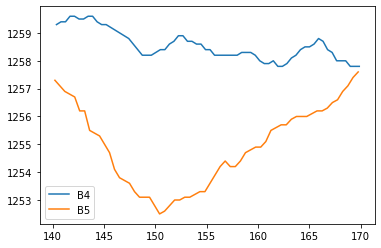

In [15]:
B4 = B4[B4.Lengthpoints >= 140]
B5 = B5[B5.Lengthpoints >= 140]

B4 = B4[B4.Lengthpoints <= 170]
B5 = B5[B5.Lengthpoints <= 170]

plt.plot(B4.Lengthpoints,B4.Values)
plt.plot(B5.Lengthpoints,B5.Values)
plt.legend(['B4','B5'])
plt.show()

In [ ]:
B4

In [ ]:
index = 0
B4_array = B4['Length'].to_numpy()
B5_array = B5['Length'].to_numpy()

for each in B5.Length:
    
    closest = np.abs(B4_array-each)
    smallest_difference_index = closest.argmin()
    closest_element = B4_array[smallest_difference_index]
    
    print(closest_element)
    
    B5_array[index] = closest_element
    index+=1
    
pd.set_option('display.max_rows', 200)

B5.Length = B5_array 
B5

In [ ]:
merged_df = pd.merge(B4,B5, how= 'left')
merged_df

In [ ]:
merged_df['difference'] = merged_df['B5_Values']-merged_df['B4_Values']
merged_df

In [ ]:
merged_df.fillna(method ='bfill', inplace = True)
merged_df.fillna(method ='pad', inplace = True)
merged_df

In [ ]:
for value in merged_df['difference']:
    if value <= -4:
        print('Houston, we have constriction')
    elif value >=4:
        print('We have expanded')

In [ ]:
print(merged_df[merged_df['difference']<=-4].index.values)